<a href="https://colab.research.google.com/github/FaithKare/Housing-prices-Prediction-/blob/master/Faith_Wangari_Data_Science_week7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question 

## a) Specyfing the analysis question 

i) Study the relationship between housing prices and the factors that affect the prices by performing univariate , bivariate and multivariate analysis. 

ii) Create models that predict sale prices of houses given the predictor variables.

## b) Metric of Success 

Getting the top factors that affect hosuing prices and ientify the best model to use to predict price. 

## c) Understanding the context

Real estate is a lucrative business because there is a high demand for good housing among people of a given area. For a real estate company, there is a need take a data driven approach; in order to analyse the factors that affect the prices of houses.


## d) Experimental Design taken 

Indented block Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:

*   Data Reading and Cleaning 

*   Exploratory Data Analysis 
> Univariate analysis , Bivariate analysis, Multivariate analysis

*   Multiple linear Regression 

*   Quantile Regression 

*   Ridge Regression 

*   Lasso regression

*   Elastic net regression 


In [ ]:
#importing the necesarry libraries to be used 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import scipy as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2.Loading and Checking the Dataset

In [ ]:
# loading the dataset 
housing = pd.read_csv("Independent Project Week 7 - house_data.csv")

# preview of the top of the data 
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# getting the number of columns and rows in the dataset 
housing.shape

(21613, 20)

In [ ]:
# getting the columns of the dataset
housing.columns.tolist()

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
# Checking the datatypes of the columns 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# 3.Data Cleaning 

In [ ]:
# checking for null values in the dataset 
housing.isnull().sum()
# there are no missing values 


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# checking for duplicated values  
housing.duplicated().sum()

# the dataset has 3 duplicated entries 
#dropping the duplicated entries
housing = housing.drop_duplicates()

# checking the shape to ensure the duplicates have been dropped
housing.shape

(21610, 20)

In [ ]:
# drop unneceasary columns not needed in the analysis 
# drop lattitude and longitude column taking the assumption that zipcode represnts this information 
 

housing = housing.drop(['id', 'lat', 'long'], axis =1)

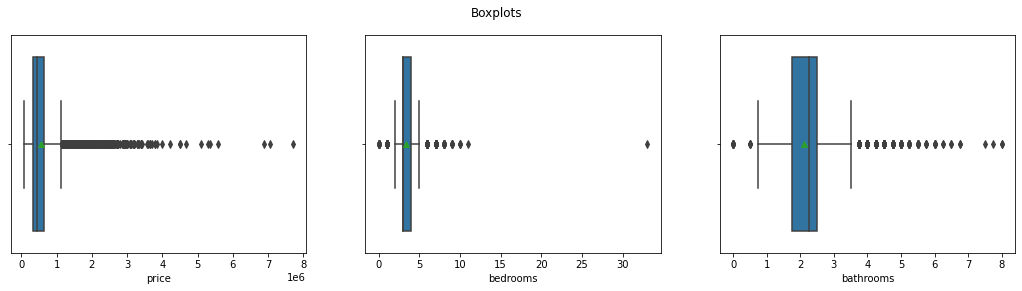

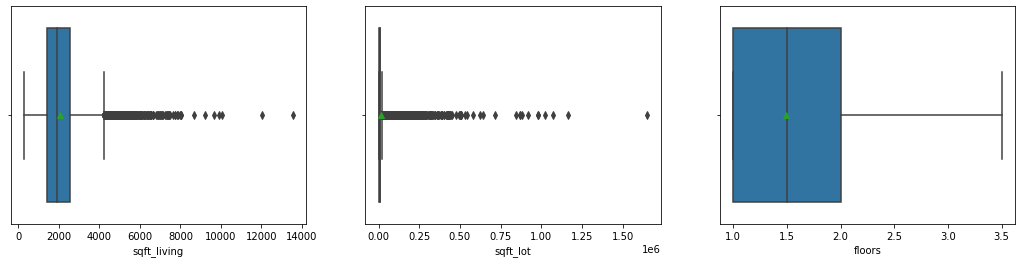

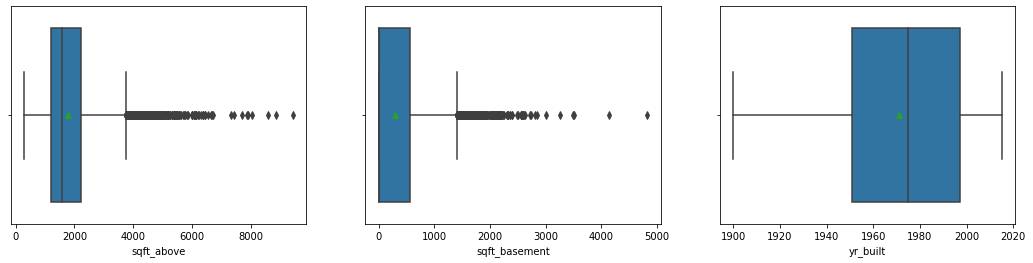

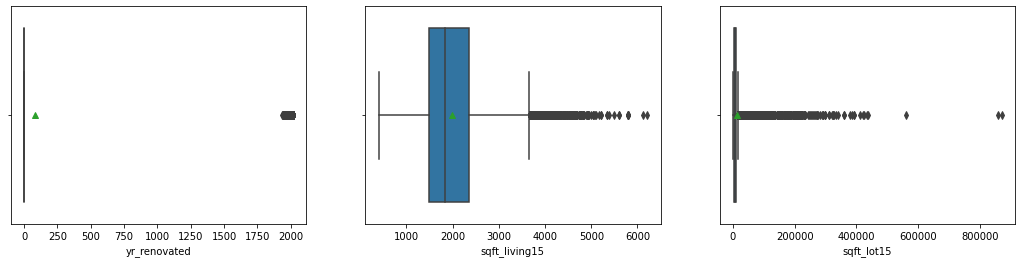

In [ ]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = housing['price'], ax=ax1, showmeans = True)
sns.boxplot(x = housing['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = housing['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(18, 4))
sns.boxplot(x = housing['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = housing['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = housing['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(18, 4))
sns.boxplot(x = housing['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x = housing['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x = housing['yr_built'], ax=ax9, showmeans = True)

fig, (ax10,ax11,ax12) = plt.subplots(1,3, figsize=(18, 4))
sns.boxplot(x = housing['yr_renovated'], ax=ax10, showmeans = True)
sns.boxplot(x = housing['sqft_living15'], ax=ax11, showmeans = True)
sns.boxplot(x = housing['sqft_lot15'], ax=ax12, showmeans = True)

plt.show()

The variables in the dataset have outliers but these outliers will not be removed as each value is necesarry in the analysis that is studying the relationship between the features and the housing prices and creation of a prediction model. 

In [ ]:
# checking for anomalies 
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3- Q1
IQR

price            323387.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1124.50
sqft_lot           5648.75
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
yr_built             46.00
yr_renovated          0.00
zipcode              85.00
sqft_living15       870.00
sqft_lot15         4983.00
dtype: float64

# 4.Exploratory Data Analysis 

## a) Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


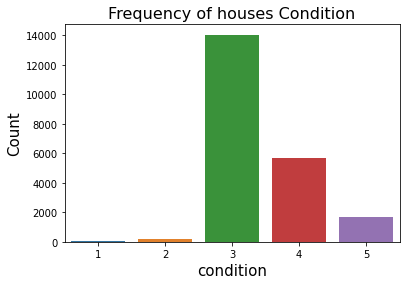

In [ ]:
# distribution of different conditions of the houses in the dataset
sns.countplot(housing[('condition')])
plt.xlabel("condition",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Frequency of houses Condition",fontsize=16)
plt.show()

#most houses are of about medium quality of 3 out of 5

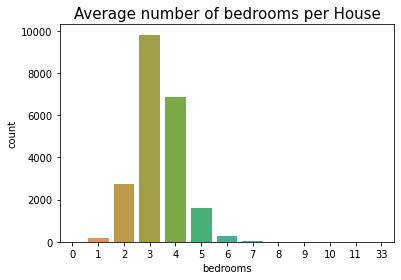

In [ ]:
#Count plots
sns.countplot(x='bedrooms',data=housing)
plt.title('Average number of bedrooms per House', fontsize = 15)
plt.show()

# most houses have three bedrooms 

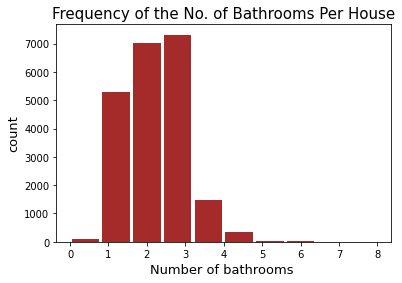

In [ ]:
# histogram of number bathrooms per house 
plt.hist(housing['bathrooms'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the No. of Bathrooms Per House', fontsize = 15)
plt.xlabel('Number of bathrooms ', fontsize = 13 )
plt.ylabel('count', fontsize = 13)
plt.show()


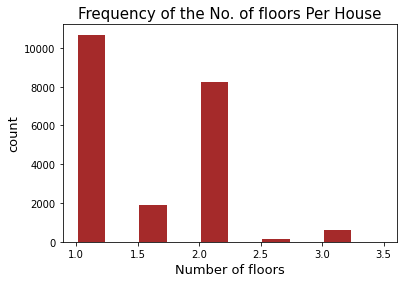

In [ ]:
# distribution of number of floors in houses ij the dataset 
plt.hist(housing['floors'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the No. of floors Per House',fontsize = 15)
plt.xlabel('Number of floors', fontsize = 13 )
plt.ylabel('count', fontsize = 13 )
plt.show()

# most houses have only one floor 

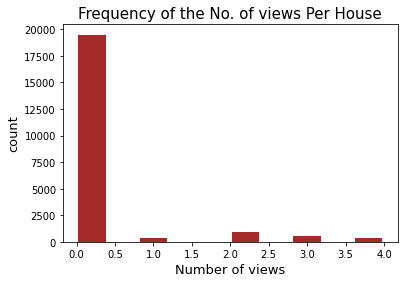

In [ ]:
# distribution of number of views 
plt.hist(housing['view'], rwidth = 0.9, color = "brown")
plt.title('Frequency of the No. of views Per House',fontsize = 15)
plt.xlabel('Number of views', fontsize = 13 )
plt.ylabel('count', fontsize = 13 )
plt.show()

# most hpuses do not have any view

Text(0, 0.5, 'count')

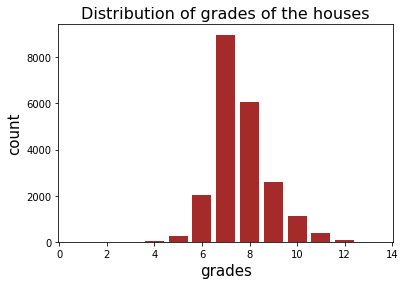

In [ ]:
# distribution of grades of the houses 
grade = housing['grade'].value_counts()
grades = [7,8,9,6,10,11,5,12,4,13,3,1]
plt.bar(grades,grade, color = 'brown')
plt.title('Distribution of grades of the houses', fontsize = 16)
plt.xlabel('grades', fontsize = 15)
plt.ylabel('count', fontsize = 15)

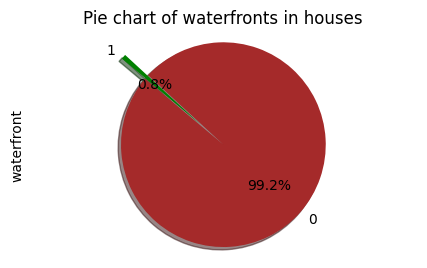

In [ ]:
# Pie Chart for waterfronts
waterfront = housing.waterfront.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.3, 0)  
colors = ['brown', 'green']

# Plotting our pie chart
waterfront.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie chart of waterfronts in houses')
plt.show()

# most houses do not have waterfronts

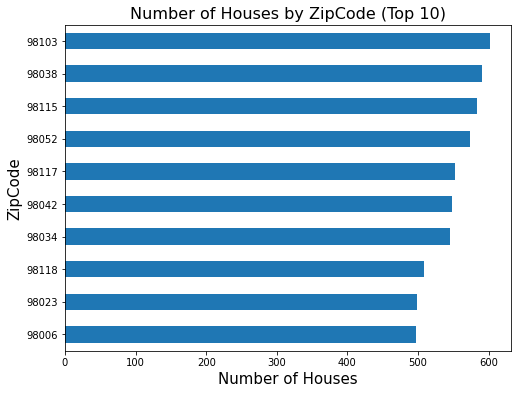

In [ ]:
plt.figure(figsize = [8,6])
top_10 = housing['zipcode'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Houses', fontsize = 15)
plt.ylabel('ZipCode', fontsize = 15)
plt.title('Number of Houses by ZipCode (Top 10)',fontsize = 16)
plt.show()

In [ ]:
#getting the measures of central dispersion 
# Checking on coefficent of variance, skewness and kurtosis on home score variable 

print('The skewness is:', housing['price'].skew())
print('The kurtosis is:', housing['price'].kurt())
print('The coefficient of variation is:', housing['price'].std()/housing['price'].mean())
print('prices Quantiles:', housing["price"].quantile([0.25, 0.5, 0.75]))

The skewness is: 4.021467451317612
The kurtosis is: 34.517437729615054
The coefficient of variation is: 0.6801220013535888
prices Quantiles: 0.25    321612.5
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


In [ ]:
#getting the measures of central tendancy of home score 

print('Mean price of houses:', housing["price"].mean())
print('Mode of prices:', housing["price"].mode())
print('Median of prices:', housing["price"].median())


Mean price of houses: 540178.9448403517
Mode of prices: 0    350000.0
1    450000.0
dtype: float64
Median of prices: 450000.0


## b) Bivariate Analysis 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Price Vs Year built')

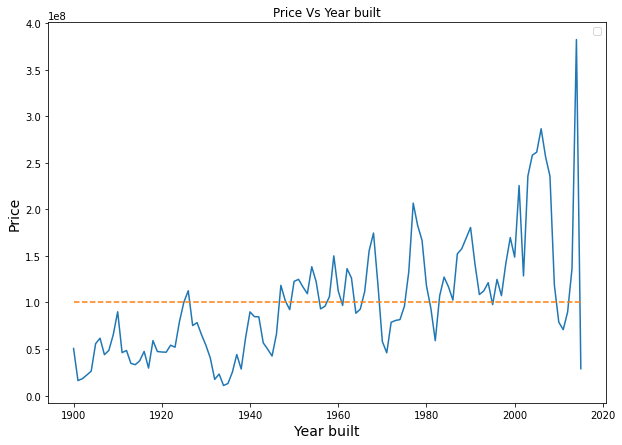

In [ ]:
# line graph of the prices  of houses against the year built 
# group by year built
line = housing.groupby(['yr_built']).sum().reset_index()

x = line['yr_built']
y = line['price']

fig, ax = plt.subplots(sharex='col', sharey='row', figsize=[10,7])
ax.plot(x,y)

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)

ax.plot(x,y_mean, linestyle='--')

# Make a legend
ax.legend(loc='upper right')

ax.set_xlabel('Year built', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Price Vs Year built')

Text(0.5, 1.0, 'Price vs Number of Bedrooms')

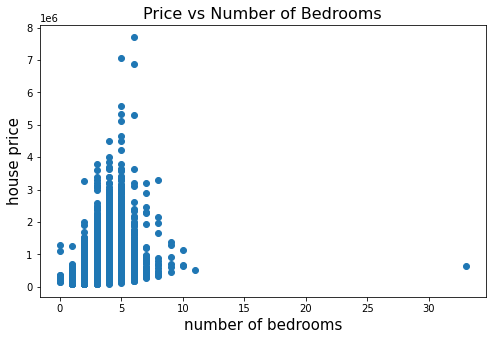

In [ ]:
#scatter plot of price vs the number of bedroom
plt.figure(figsize= (8,5))
plt.scatter(housing["bedrooms"],housing["price"])
plt.ylabel("house price", fontsize = 15)
plt.xlabel("number of bedrooms", fontsize = 15)
plt.title("Price vs Number of Bedrooms", fontsize = 16)

Text(0.5, 1.0, 'price vs Number of Bathrooms')

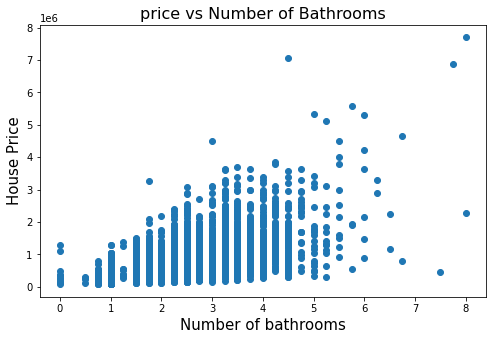

In [ ]:
#scatter plot of price vs the number of bathrooms
plt.figure(figsize= (8,5))
plt.scatter(housing["bathrooms"],housing["price"])
plt.ylabel("House Price", fontsize = 15)
plt.xlabel("Number of bathrooms", fontsize = 15)
plt.title("price vs Number of Bathrooms", fontsize = 16)

# the scatter plot shows a positively correlated relationship beetwen number of bathrooms and the price if hosuses 

Text(0.5, 1.0, 'price vs number of views in a house')

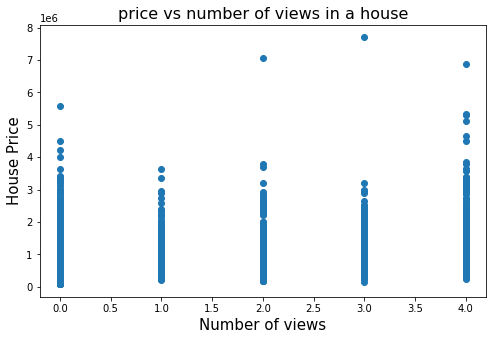

In [ ]:
#scatter plot of price vs the number of views in the house
plt.figure(figsize= (8,5))
plt.scatter(housing["view"],housing["price"])
plt.ylabel("House Price", fontsize = 15)
plt.xlabel("Number of views", fontsize = 15)
plt.title("price vs number of views in a house", fontsize = 16)

# scatter plot shoes no relationship between number of views in a house and  its price. 

Text(0.5, 1.0, 'price vs number of Floors in a house')

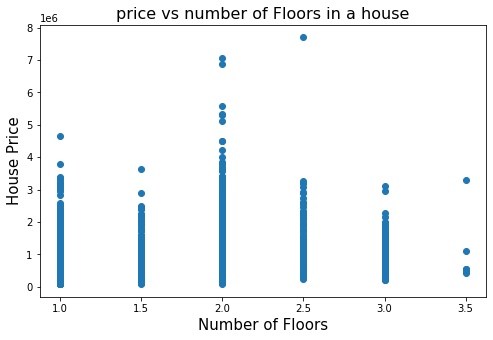

In [ ]:
plt.figure(figsize= (8,5))
plt.scatter(housing["floors"],housing["price"])
plt.ylabel("House Price", fontsize = 15)
plt.xlabel("Number of Floors", fontsize = 15)
plt.title("price vs number of Floors in a house", fontsize = 16)


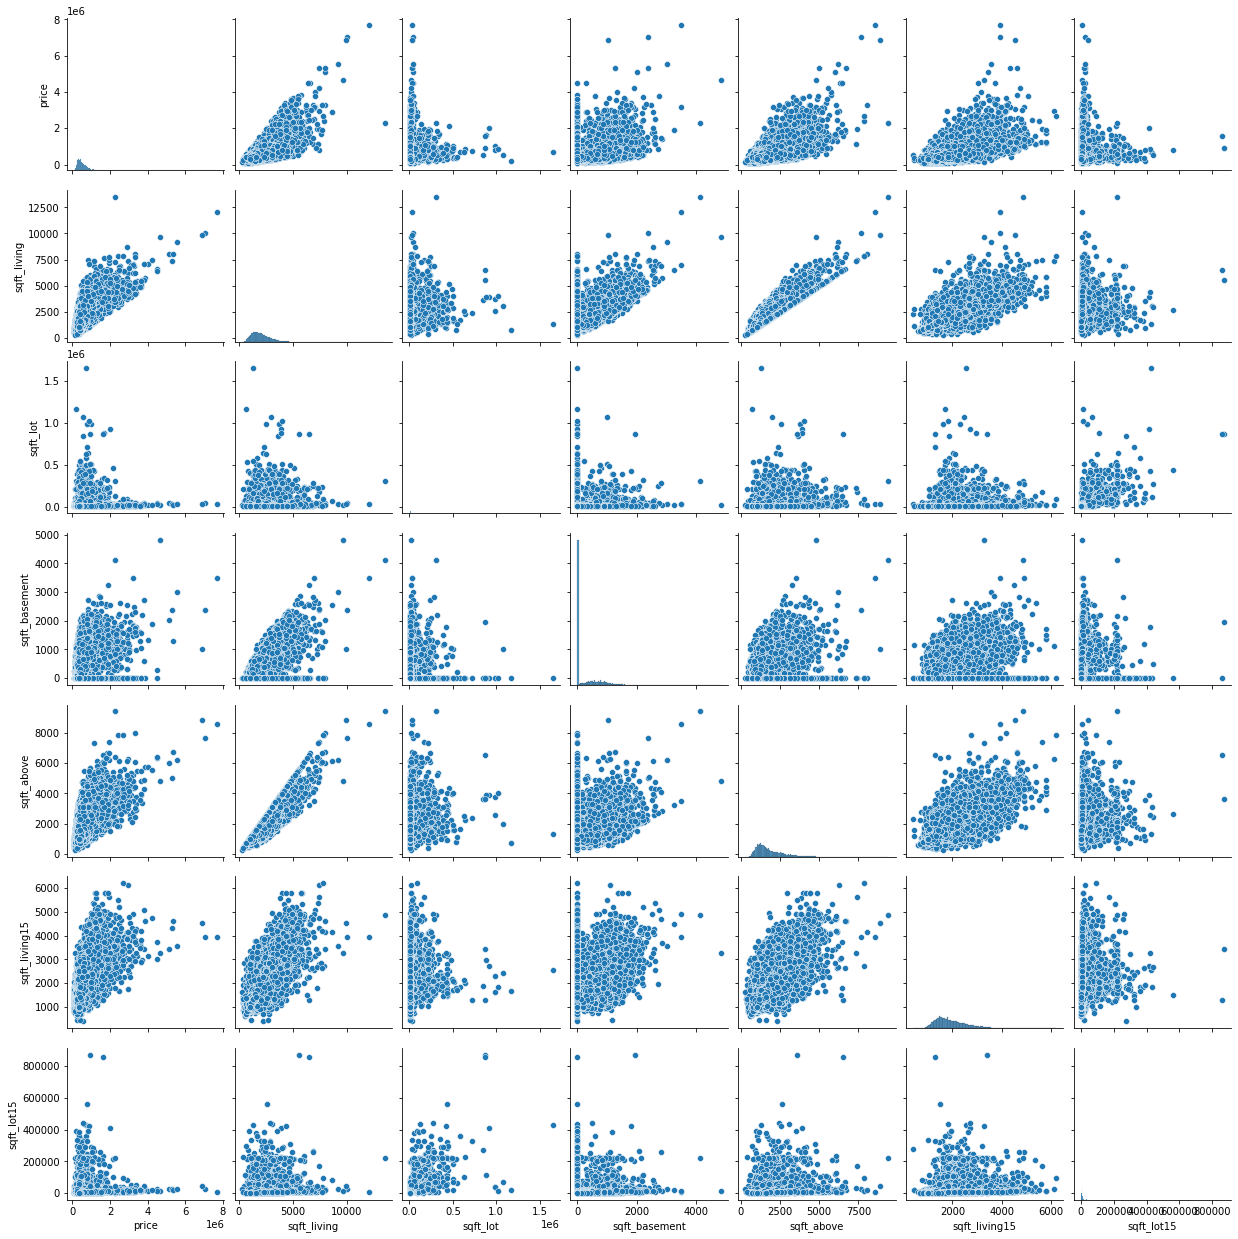

In [ ]:
# pairplot of variables in the combined dataset

sns.pairplot(housing[['price', 'sqft_living', 'sqft_lot','sqft_basement', 'sqft_above', 'sqft_living15','sqft_lot15']])

The visualizations from the above pairplot we can see interesting relationships between the label(Price) and features especially sqft_living, sqft_above, sqft_basement and sqft_living15 which exhibit a positive linear relationship.


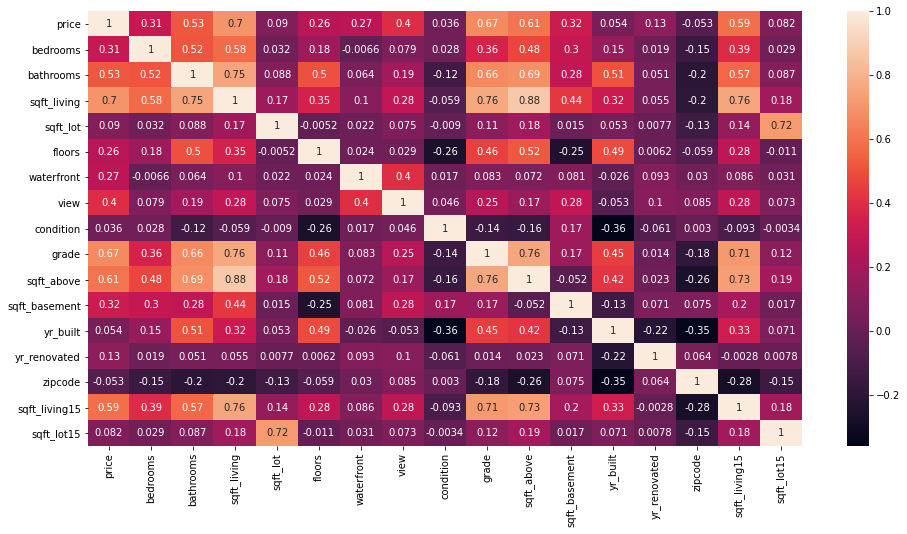

In [ ]:
#heatmap of the variables correlations 
plt.figure(figsize=(16, 8))

vg_corr = housing.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);


## c) Multivariate Analysis 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

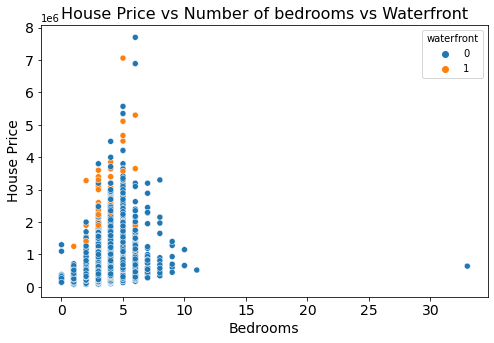

In [ ]:
# Analysis of house price, watefronts and bedrooms

plt.figure(figsize=(8,5))
sns.scatterplot(x= housing['bedrooms'], y= housing['price'], hue= housing['waterfront'])
plt.title('House Price vs Number of bedrooms vs Waterfront', fontsize = 16)
plt.xlabel('Bedrooms', fontsize = 14)
plt.ylabel('House Price', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

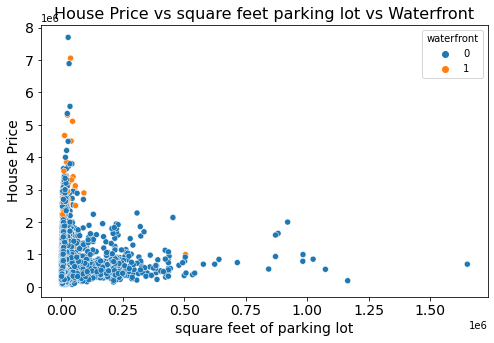

In [ ]:
# Analysis of house price, watefronts and bedrooms

plt.figure(figsize=(8,5))
sns.scatterplot(x= housing['sqft_lot'], y= housing['price'], hue= housing['waterfront'])
plt.title('House Price vs square feet parking lot vs Waterfront', fontsize = 16)
plt.xlabel('square feet of parking lot', fontsize = 14)
plt.ylabel('House Price', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

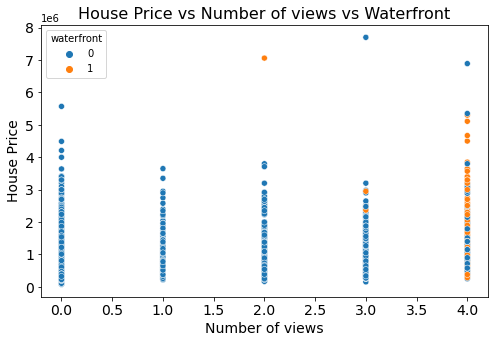

In [ ]:
# Analysis of house price, watefronts and bedrooms

plt.figure(figsize=(8,5))
sns.scatterplot(x= housing['view'], y= housing['price'], hue= housing['waterfront'])
plt.title('House Price vs Number of views vs Waterfront', fontsize = 16)
plt.xlabel('Number of views', fontsize = 14)
plt.ylabel('House Price', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

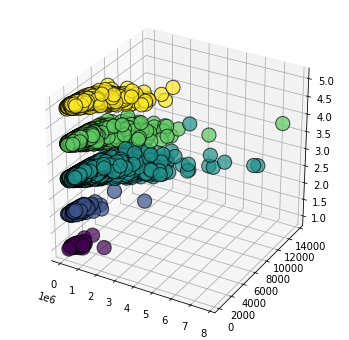

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = housing['price']
y = housing['sqft_living']
z = housing['condition']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

# 5.Multiple Linear Regression

## a) Checking for Multicolinearity 

In [ ]:
# we want to focus on our independent variables only.
independent_only = housing.drop(columns=['price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,0.731870,0.194060


In [ ]:
# we then compute the variance infalation factor (VIF). 
# A measure of how much the variance of regression coefficient in your model increases if your independent variables are correlated.
# creating an inverse matrix of the correlation table above 

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.649706,-0.460263,-6.145192e-01,0.048581,0.053491,0.062317,0.108333,-0.053360,0.316784,-3.215185e-01,-1.848430e-01,0.126914,0.044417,0.084915,0.033735,0.085738
bathrooms,-0.460263,3.348430,-3.154897e+00,-0.018621,-0.684087,0.009662,-0.040528,-0.135008,-0.289543,1.588328e+00,4.348914e-01,-0.911702,-0.257444,0.011506,0.098746,0.077080
sqft_living,-0.614491,-3.155572,1.814600e+13,-0.065186,2.701005,-0.078289,-0.014923,-0.171742,-2.001256,-1.636081e+13,-8.743992e+12,0.538324,0.165252,-0.452975,-1.033359,-0.030422
sqft_lot,0.048581,-0.018621,-6.438490e-02,2.091008,0.061803,0.028914,-0.058659,0.027542,-0.013042,-1.726993e-01,2.032980e-03,0.050797,0.015658,0.061440,0.142543,-1.472133
floors,0.053491,-0.684087,2.703564e+00,0.061803,1.985252,-0.006834,-0.034181,0.096836,-0.297414,-2.895580e+00,-7.085070e-01,-0.407361,-0.070767,-0.263829,0.293003,0.089932
waterfront,0.062317,0.009662,-7.897234e-02,0.028914,-0.006834,1.203454,-0.495109,-0.013328,0.046375,-3.736375e-02,3.286368e-02,-0.016281,-0.065459,0.014189,0.060788,-0.016347
view,0.108333,-0.040528,-1.341100e-02,-0.058659,-0.034181,-0.495109,1.419694,-0.027464,-0.168530,4.830152e-02,-2.480698e-01,0.142126,-0.041490,-0.141637,-0.299488,-0.004028
condition,-0.053360,-0.135008,-1.720090e-01,0.027542,0.096836,-0.013328,-0.027464,1.246059,-0.036361,2.006653e-01,-1.010095e-02,0.544377,0.204383,0.178468,0.080739,-0.030345
grade,0.316784,-0.289543,-2.006608e+00,-0.013042,-0.297414,0.046375,-0.168530,-0.036361,3.250756,3.157028e-01,4.294049e-01,-0.455577,-0.048451,-0.145508,-0.865237,0.113863
sqft_above,-0.324992,1.587366,-1.636081e+13,-0.171832,-2.892580,-0.037881,0.049345,0.200325,0.311058,1.475124e+13,7.883763e+12,-0.099075,-0.166209,0.507073,-0.654537,-0.182231


A rule of thumb for interpreting the variance inflation factor is that VIF scores of 1 indicate that the independent variables are not correlated. Between 1 and 5 indicates that they are moderately correlated and greater than 5 indicates high correlation.

From the analysis above the variables with high multicolinearity are: bathrooms with a VIF of 3.34 , sqft_basement with a VIF of 4.23 and grade with a VIF of 3.25
Since the primary goal of this model is to make predictions, and not necessarily to understand the role of each independent variable in the prediction, I will not make any changes to these variables that have exhibited high multicollinearity, since multicollinearity affects only the co-efficients and p-values, and not the overall prediction.



## b) Multiple Linear regression 

In [ ]:
# specyfying the idependent variables (x) and dependent variable (y)
X = housing.drop('price', axis=1)
y = housing['price']

#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting the test results 
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[631803.03 680200.  ]
 [468003.77 550000.  ]
 [248952.36 230000.  ]
 ...
 [559066.66 395000.  ]
 [426192.1  489000.  ]
 [307679.48 382500.  ]]


In [ ]:
# evaluating the model and calcluting the RMSE and R2 squraed 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 139286.0267217424
Mean Squared Error: 44294147458.20659
Root Mean Squared Error: 210461.74820666722
R-Squared: 0.6629578142070495


The above model shows that the features explain about 66.295781% of the variance in the data which is not ideal. The RMSE is high about 38% of the mean price (approximately 540,178) which also shows the model is not performing well.

## c) Assesing Heteroskadisticity 

In [ ]:
# Create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_pred, y_test)

# Describe our residual:
print(pd.DataFrame(residuals).describe())

print('*'*50)

print('residuals mean:', residuals.mean())

              price
count  4.322000e+03
mean  -3.999520e+03
std    2.104481e+05
min   -2.119574e+06
25%   -9.362616e+04
50%    4.124553e+03
75%    1.063116e+05
max    1.400367e+06
**************************************************
residuals mean: -3999.520279441097


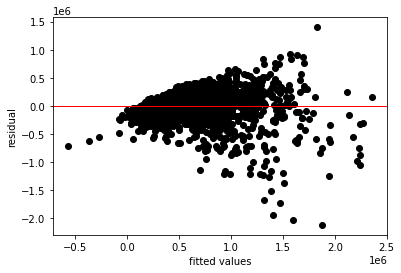

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous! (homoskedasticity)')


557.6734694070482
inf
the variances are homogeneous! (homoskedasticity)


# 6.Quantile Regression 

In [ ]:
x = housing.drop(['price'],1).index.values.reshape(-1, 1)
y = housing['price'].values.reshape(-1, 1)

# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('price ~ sqft_living', housing)
res = mod.fit(q =.5)

# Then print out the summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2479
Model:                       QuantReg   Bandwidth:                   3.151e+04
Method:                 Least Squares   Sparsity:                    4.835e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21610
Time:                        03:14:06   Df Residuals:                    21608
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.27e+04   4071.040     12.944      0.000    4.47e+04    6.07e+04
sqft_living   216.7401      1.791    121.048      0.000     213.231     220.250

The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical proble

You see that our intercept is 5.27 and our slope or the coefficient for our x that is square foot of living area is 216.7401 
These are the parameters for the 0.5th quantile of our dependent variable (prices). 

That is the 50th percentile of house prices = 5.27e+0.4 + 216.74*sqftliving

In [ ]:
# getting the models for other quantiles 
quantiles = np.arange(0.1,1,0.1) #start, stop, increment by
models = []
params = []

# Build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


    qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1  42836.363608  123.636364      121.910889      125.361838
1  0.2  34093.556937  151.809356      149.768675      153.850036
2  0.3  28294.573645  178.682171      175.967625      181.396716
3  0.4  33434.083831  201.463473      198.244432      204.682515
4  0.5  52696.035240  216.740088      213.230524      220.249652
5  0.6  72811.447811  230.639731      227.224897      234.054564
6  0.7  84736.301368  251.027397      246.984937      255.069857
7  0.8  86602.870889  287.081340      281.563940      292.598739
8  0.9  54210.000000  371.000000      362.604339      379.395661


Below are interpretaions of some of the quatiles 

The 20th percentile of house prices = 34093.55 + 151.80*sqftliving 

The 90th percentile of house prices = 54210 + 371*sqftliving 

In [ ]:
# getting the models for other quantiles 
quantiles = np.arange(0.1,1,0.1) #start, stop, increment by
models = []
params = []

# Build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params.
mod = smf.quantreg('price ~ bedrooms', housing) 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms']] + res.conf_int().loc['bedrooms'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  119799.999998   40050.000001    37230.100748    42869.899253
1  0.2  134999.999998   50000.000001    47090.337138    52909.662863
2  0.3  149750.000007   61049.999999    57639.130857    64460.869140
3  0.4  165000.000001   72500.000000    68716.436956    76283.563044
4  0.5  179999.999994   85000.000002    81011.031417    88988.968587
5  0.6  188333.333332  101666.666667    96935.830917   106397.502417
6  0.7  189574.999995  122712.500002   117858.065984   127566.934021
7  0.8  191000.000003  151999.999998   145541.134223   158458.865774
8  0.9  150000.000001  215000.000000   203156.804610   226843.195389


Below are interpretaions of some of the quatiles 

The 20th percentile of house prices = 134999 + 50000*bedrooms

the 50th percentile of house prices = 179999 + 850000*bedrooms

The 90th percentile of house prices = 150000 + 215000*bedrooms 

In [ ]:
# getting the models for other quantiles 
quantiles = np.arange(0.1,1,0.1) #start, stop, increment by
models = []
params = []

# Build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
mod = smf.quantreg('price ~ floors', housing)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['floors']] + res.conf_int().loc['floors'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  148999.999996   71000.000004    66847.999372    75152.000636
1  0.2  176497.500015   83502.499995    78888.287543    88116.712446
2  0.3  211903.999998   93096.000001    87047.443737    99144.556265
3  0.4  244200.000001  105799.999999    99256.785571   112343.214427
4  0.5  274999.999992  125000.000004   117877.833457   132122.166551
5  0.6  291000.000005  155999.999999   148512.463187   163487.536810
6  0.7  305999.999998  197000.000001   187934.366441   206065.633561
7  0.8  339999.999996  240000.000001   229869.626931   250130.373072
8  0.9  369999.999999  340000.000000   320170.402565   359829.597436


Below are interpretaions of some of the quatiles 

The 20th percentile of house prices = 176497 + 83502*floors

the 50th percentile of house prices = 274999 + 125000*floors

The 90th percentile of house prices = 369999 + 340000*floors

# 7.Ridge Regression 

Ridge regression uses L2 regularization and assigns a penalty that is the squared magnitude of the coefficients to the loss function multiplied by lambda. As Lasso does, ridge also adds a penalty to coefficients the model overemphasizes. The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients. The larger your value of lambda, the more likely your coefficients get closer and closer to zero. Unlike lasso, the ridge model will not shrink these coefficients to zero.

In [ ]:
# importing the libraries 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge # all the other necessary libraries have already been imported in the code cells above


In [ ]:
# Setting up our X and y datasets
#Since Ridge Regression is not affected by multicollinearity we use the dataset that has collineated features
X = housing.drop('price', axis=1)
y = housing['price']

#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.001}


47775461543.108284

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
first_model = (mean_squared_error(y_true = y_test ,y_pred = ridge.predict(X_test)))
fir_model = (np.sqrt(mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test))))
rsecond_model = (r2_score(y_true=y_test,y_pred=ridge.predict(X_test)))
print("MSE: ", first_model)
print("RMSE: ", fir_model)
print("R-squared: ", rsecond_model)

MSE:  44293413383.78306
RMSE:  210460.00423781964
R-squared:  0.6629633999122146


The R squared achieved by the ridge model is 66.296339 which is slightly better than the R squared of the Multiple linear regression model.  

In [ ]:
# The coefficients show different weightings
 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 33503.446557533745,
 'bedrooms': -36792.36600135952,
 'condition': 13244.887212760696,
 'floors': 14078.797769301102,
 'grade': 139643.1063865758,
 'sqft_above': 64302.98278122818,
 'sqft_basement': 38393.32963483999,
 'sqft_living': 76439.15719723099,
 'sqft_living15': 18411.10831638371,
 'sqft_lot': 271.7863503347446,
 'sqft_lot15': -14658.673963933708,
 'view': 32999.3024663751,
 'waterfront': 54540.644548119344,
 'yr_built': -102982.36093487518,
 'yr_renovated': 4215.328274469423,
 'zipcode': 587.6065280321221}

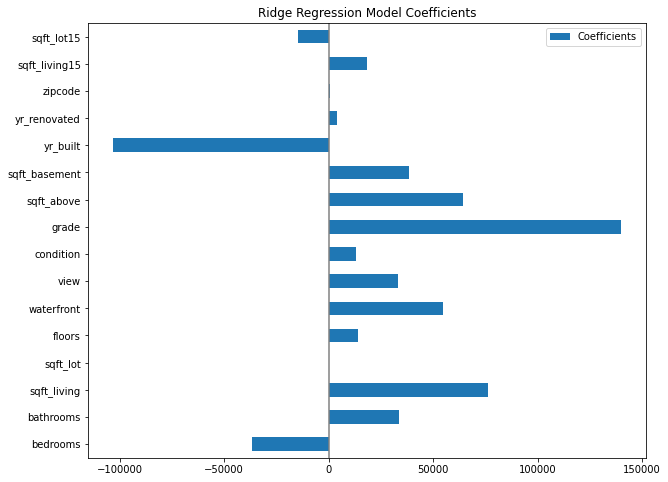

In [ ]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(ridge.coef_, columns=['Coefficients'], index=features)
feat_coef

#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge Regression Model Coefficients')
plt.axvline(x=0, color='.5')
plt.show()


# 8.Lasso Regression 

Lasso regression uses the L1 regularization by adding a penalty equal to the absolute value of the magnitude of the coefficients multiplied by lambda. The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients. This penalty reduces the value of many coefficients to zero, all of which are eliminated.
This reduces the degree of overfitting that occurs within the model.

In [ ]:
# specyfying the features and label
X = housing.drop('price', axis=1)
y = housing['price']

#standardizing and feature scaling 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

#splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# setting the parameter space 
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6523744435411076
linear score: 0.652374423578912
lasso MSE: 47631823271.40469
linear MSE: 47631826006.6345
lasso best estimator coef: [ -35497.28   31096.68  270505.89     375.66   15417.83   57122.56
   31888.32   13687.55  141563.88 -114345.41  -55008.09 -102189.53
    5327.02    1406.1    18904.33  -13290.87]
linear coef: [ -35497.39   31097.35   74864.49     375.96   15417.84   57122.64
   31888.28   13687.69  141563.67   62048.2    39264.96 -102189.71
    5327.11    1406.24   18904.96  -13291.16]


Lasso model proved to provide an almost similar model to linear. However it gave a model with a slightly lower R-squared percentage of 65.2374% compared to 66.29% of the ridge regression model.  L1 regularization is the one used for lasso regression. But here we can note none of the features were reduced to zero and thus dropped. This means all the features are important in predicting house price. In this case it would be better to use Ridge since there's no danger of feature selection especially with a dataset that has a low number of features such as this one. Additionally Ridge handles multicollinear variables and won't reduce them like Lasso.


# 9.Elastic Net Regression 

Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model’s predictions.

In [ ]:
X = housing.drop('price', axis=1)
y = housing['price']

# split dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# elastic net model  
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We will now fit our model and display the best parameters and the best results we can get with that setup.
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)


{'alpha': 1e-05, 'l1_ratio': 0.8}


47438557644.266426

In [ ]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)

elastic.fit(X_train,y_train)
third_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
th_m = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
third_m = r2_score(y_true=y_test,y_pred=elastic.predict(X_test))
print("MSE: ", third_model)
print("RMSE:", th_m)
print("R-squared: ", third_m)


# With these settings we got an R-square of only 45% . 
# Which means that elastic net is doing worse than linear, lasso and ridge regression. 


MSE:  49176291026.40184
RMSE: 221757.27953418315
R-squared:  0.6527421314924909


The R squared achieved is 65.27% and the MSE is the highest of all the models created above 

In [ ]:
#Below are the coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that view has been greatly minimized in the elastic net version. 
# This means that this values was not as important to the algorithm.


{'bathrooms': 33657.0328560795,
 'bedrooms': -34919.85872899774,
 'condition': 14821.608287263758,
 'floors': 15862.076770788113,
 'grade': 132459.57076701522,
 'sqft_above': 59278.05576480598,
 'sqft_basement': 38330.26985385046,
 'sqft_living': 71880.10544732976,
 'sqft_living15': 24725.1800035324,
 'sqft_lot': 1329.1003865407765,
 'sqft_lot15': -13114.09813338975,
 'view': 32799.49965081654,
 'waterfront': 53152.75714127437,
 'yr_built': -95908.91961614405,
 'yr_renovated': 5554.941117858375,
 'zipcode': 3487.9512770245124}

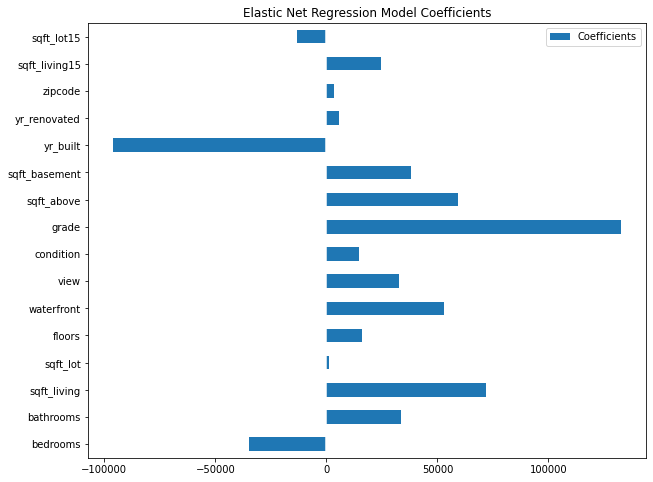

In [ ]:
# creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(elastic.coef_, columns=['Coefficients'], index=features)
feat_coef

feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Elastic Net Regression Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()

It had a R-squared of about 65.27%. It is important to note how it used mostly L1 regularization (at 0.8 L1_ratio) to reduce some feature weights like square feet of parking lot which was almost zero but did not remove them (compare Lasso and Elastic Net).This balancing effect is because of the L2 regularization effect. This is where Elastic Net shines through, performing feature selection whilst maintaining any correlated features in the model.

# Conclusion 

To conclude, Lasso, Ridge, and Elastic Net are excellent methods to improve the performance of your linear model. This includes if you are running a neural network, a collection of linear models. Lasso will eliminate many features, and reduce overfitting in your linear model. Ridge will reduce the impact of features that are not important in predicting your y values. Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model’s predictions.



Ultimately, which model to use ultimately depends on the goal of the analysis to begin with. since our goal was to find the best predictive model then ridge  regression appears best since it has the least Mean Square Error. 

Mean square error is the avearge value of the squares that is differnce between observed values and predicted values. 

If our goal was interpretability, for a better understanding of the underlying data? Then Elastic Net may be the way to.

# Challenge the solution 

These models can be improved by performing parameter tuning on each since these algorithms have many parameters that can be adjusted to improve the model. 
Additionally we've not used location information (a cross feature of latitude and longitude) that could possibly allow the models used to learn about correlations in housing blocks as compared to ZipCodes which are too expansive. This may produce higher R-squared values and hence better model performance.

# Follow Up Questions 

a) Did we have the right data 

It may be possible to answer this question conclusively once we've included the latitude and longitude and observed the model/evaluated it. But with all other features except the 2 features we get models that explain about 60% of the variance in the data So we can say we have some of the right data.

b) Do we need other data to answwer the question 

In line with the issue of right data, it is recommended that indeed we should increase the number of explanatory variables/features that explain the house prices thus enabling us to get better prediction models

c) Did we have the right question 

Given the dataset and the business objective, the right question was asked and explored. 